In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tested.csv to tested.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
titanic = pd.read_csv(r'tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


In [ ]:
print('Titanic Dataset: ', titanic.size)
print('Titanic Dataset: ', titanic.shape)

Titanic Dataset:  5016
Titanic Dataset:  (418, 12)


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Data** **Visualiation**

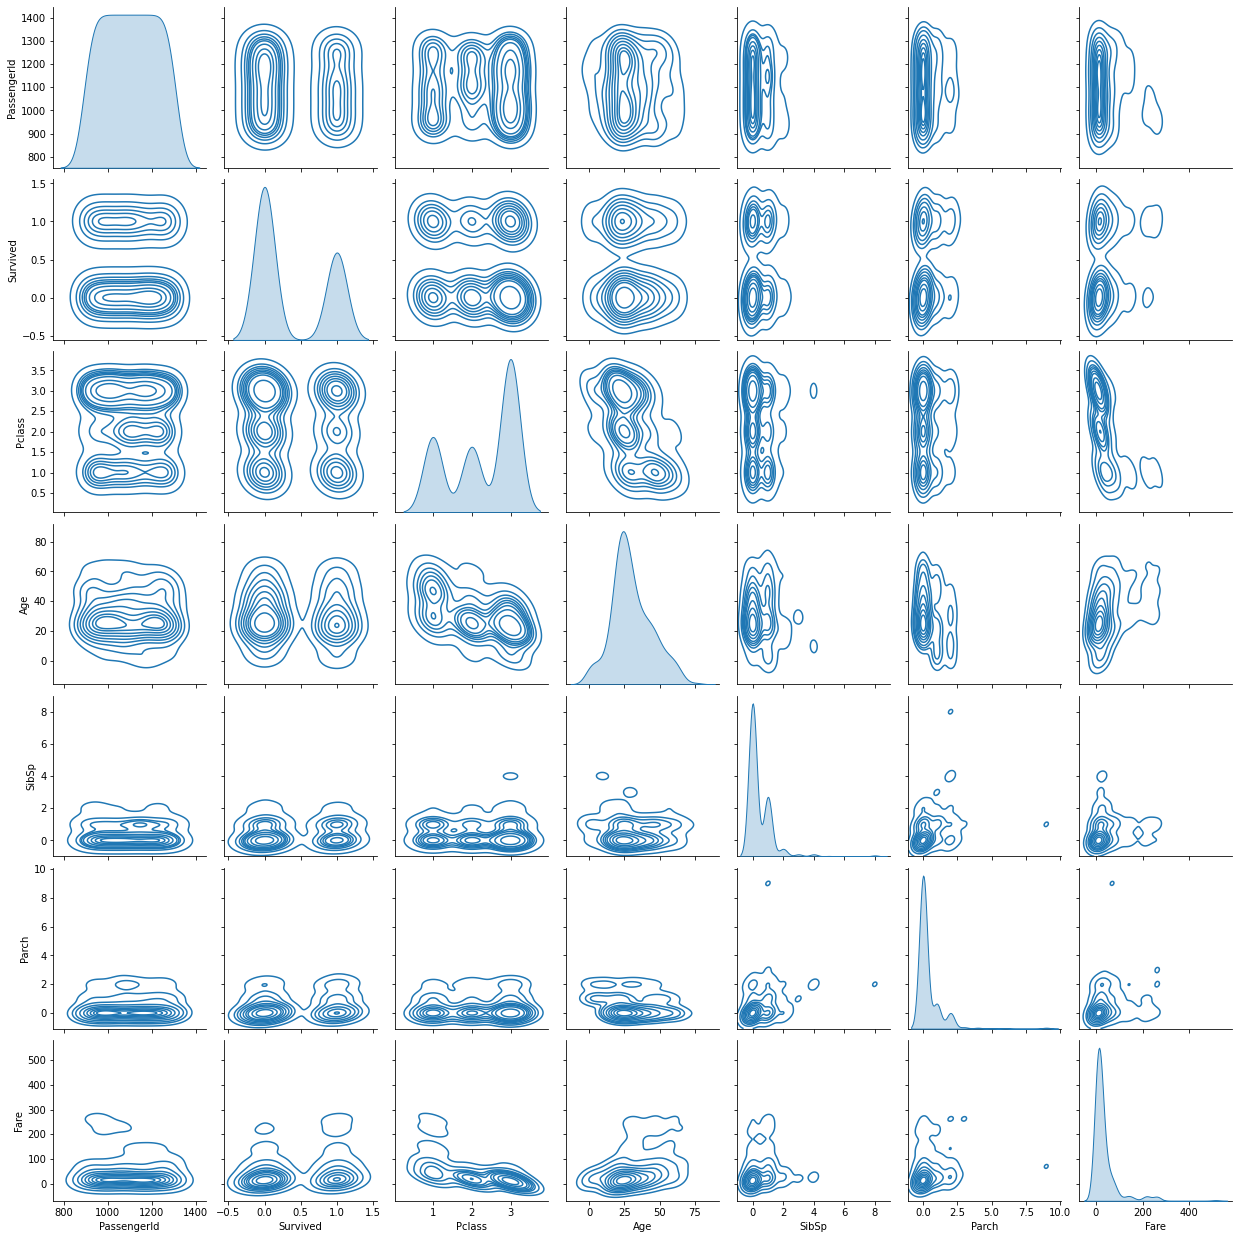

In [ ]:
g = sns.pairplot(titanic, kind = "kde")
print(g)

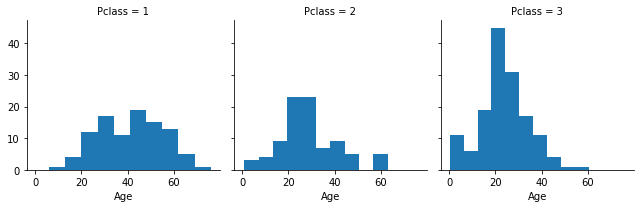

In [ ]:
g = sns.FacetGrid(titanic, col = 'Pclass')
g = g.map(plt.hist, 'Age')


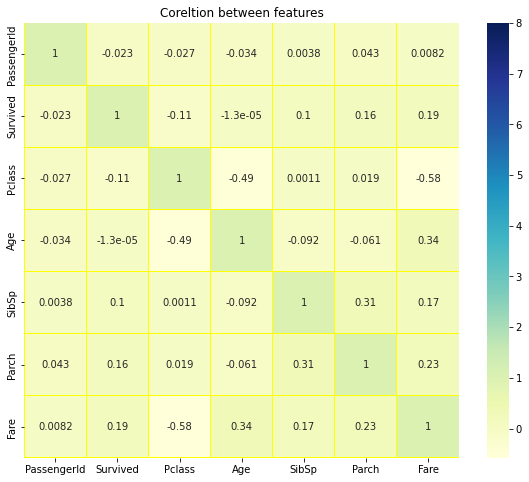

In [ ]:
corr = titanic.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=8, linewidths = 0.01, square = True, annot = True, cmap = 'YlGnBu', linecolor = 'yellow')
plt.title('Coreltion between features')
plt.show()


In [ ]:
high_corr = titanic.corr()
high_corr_features = high_corr.index[abs(high_corr["Fare"]) >= 0.25]
high_corr_features

Index(['Pclass', 'Age', 'Fare'], dtype='object')

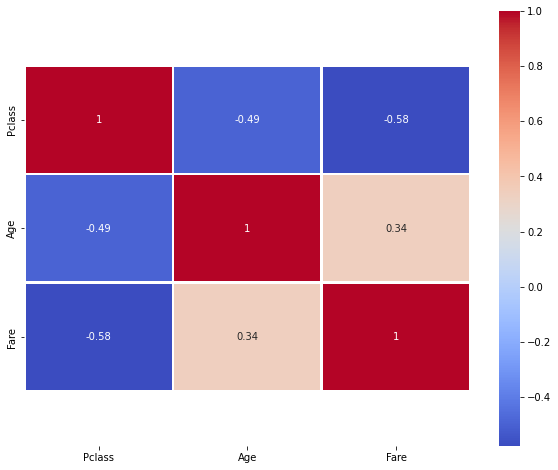

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(titanic[high_corr_features].corr(), cmap = "coolwarm", annot = True, linewidth = 2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# **Data** **Preprocessing**

In [ ]:
titanic.isnull().sum().sort_values(ascending=False)


Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
def missing(df):
  missing_number = df.isnull().sum().sort_values(ascending=False)
  missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
  return missing_values

In [ ]:
missing(titanic)


,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


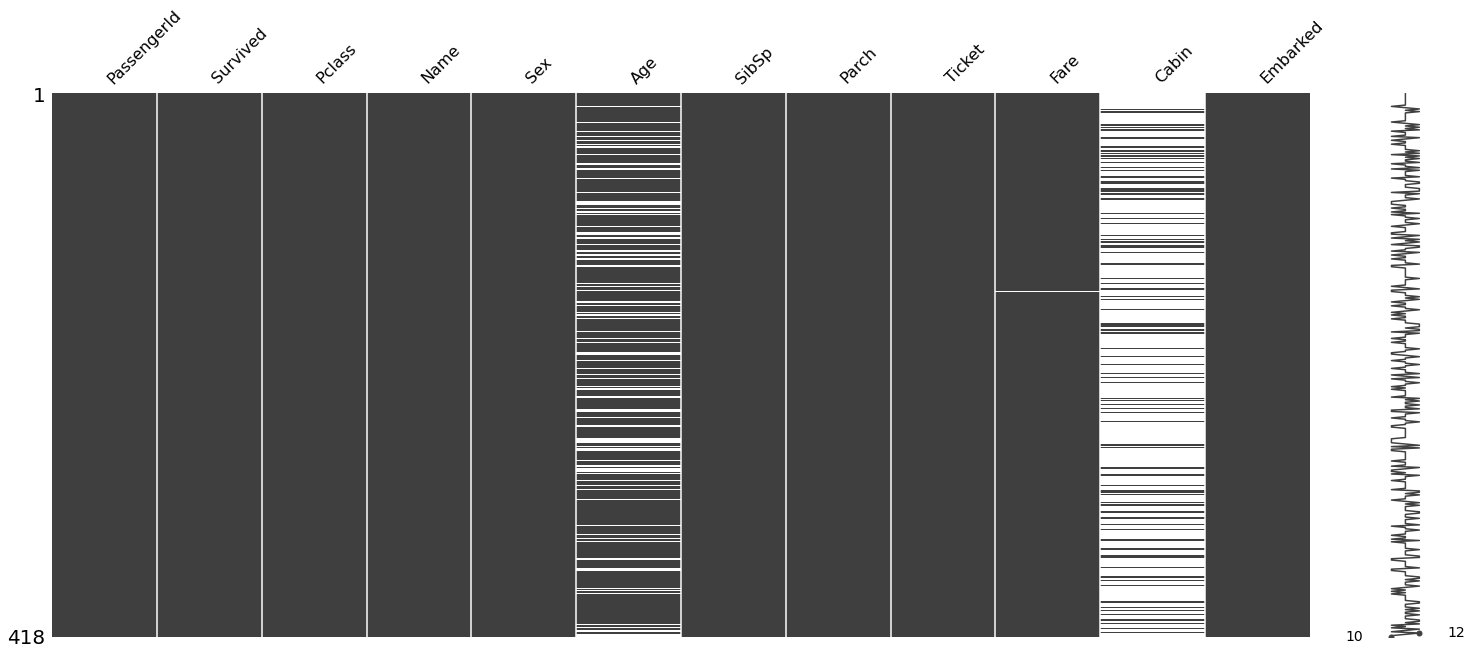

In [ ]:
import missingno as msno
msno.matrix(titanic)
plt.show()

**Removing Null Values** **from** **the** **Dataset**

In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

In [ ]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic.head(2)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.9 MB/s 


In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ['Survived', 'Pclass', 'Embarked', 'Sex'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.50000,0,0,7.8292,1
1,2,1,2,47.00000,1,0,7.0000,2
2,1,2,1,62.00000,0,0,9.6875,1
3,1,1,1,27.00000,0,0,8.6625,2
4,2,1,2,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1,1,1,30.27259,0,0,8.0500,2
414,2,3,2,39.00000,0,0,108.9000,3
415,1,1,1,38.50000,0,0,7.2500,2
416,1,1,1,30.27259,0,0,8.0500,2


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols = ['Survived', 'Pclass', 'Embarked', 'Sex'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.50000,0,0,7.8292,1
1,2,1,2,47.00000,1,0,7.0000,2
2,1,2,1,62.00000,0,0,9.6875,1
3,1,1,1,27.00000,0,0,8.6625,2
4,2,1,2,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1,1,1,30.27259,0,0,8.0500,2
414,2,3,2,39.00000,0,0,108.9000,3
415,1,1,1,38.50000,0,0,7.2500,2
416,1,1,1,30.27259,0,0,8.0500,2


In [ ]:
x = titanic_encoded.drop(['Survived'],axis = 1)
y = titanic['Survived']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
118,3,1,36.00000,0,0,75.2417,3
271,1,1,30.27259,0,0,7.7500,1
114,3,2,63.00000,1,0,221.7792,2
311,1,1,22.00000,0,0,7.2250,3
131,3,1,53.00000,0,0,28.5000,3


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

## **Model Implementation**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Training Set Score: {:.2f}".format(lr.score(x_train, y_train)), '\n')
print("Testing Set Score: {:.2f}".format(lr.score(x_test, y_test)), '\n')
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred_lr)), '\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr), '/n')
print("Classification Report: \n", classification_report(y_test, y_pred_lr))


Training Set Score: 1.00 

Testing Set Score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[85  0]
 [ 0 41]] /n
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_lr) * 100
print("Logistic Regression Accuracy: " +str(round(accuracy, 2)) + '%')
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))


Logistic Regression Accuracy: 100.0%
MAE:  0.0
MSE 0.0
RMSE:  0.0


**Random Forest Classifier** **- Citerion = "Entropy"**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_ent = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_ent.fit(x_train, y_train)
y_pred_rfe = rf_ent.predict(x_test)


print("Training Score: {:0.2f}".format(rf_ent.score(x_train, y_train)))
print("Testing Score: {:0.2f}".format(rf_ent.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_rfe))
print("Classification Report: \n",classification_report(y_test, y_pred_rfe))


Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Random Forest Classifier** **- Citerion = "Gini"**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_ent = RandomForestClassifier(criterion='gini', n_estimators=100)
rf_ent.fit(x_train, y_train)
y_pred_rfe = rf_ent.predict(x_test)


print("Training Score: {:0.2f}".format(rf_ent.score(x_train, y_train)))
print("Testing Score: {:0.2f}".format(rf_ent.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_rfe))
print("Classification Report: \n",classification_report(y_test, y_pred_rfe))


Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Naive Bayes Gaussian NB Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Gnb = GaussianNB()
Gnb.fit(x_train, y_train)
y_pred_Gnb = Gnb.predict(x_test)

print("Training Score: {:0.2f}".format(Gnb.score(x_train, y_train)))
print("Testing Score: {:0.2f}".format(Gnb.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred_Gnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_Gnb))
print("Classification Report: \n",classification_report(y_test, y_pred_Gnb))

Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Naive Bayes Bernoulli NB Classifier**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Bnb = BernoulliNB()
Bnb.fit(x_train, y_train)
y_pred_Bnb = Bnb.predict(x_test)

print("Training Score: {:0.2f}".format(Bnb.score(x_train, y_train)))
print("Testing Score: {:0.2f}".format(Bnb.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred_Bnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_Bnb))
print("Classification Report: \n",classification_report(y_test, y_pred_Bnb))

Training Score: 0.61
Testing Score: 0.71
Accuracy Score: 0.71
Confusion Matrix: 
 [[81  4]
 [32  9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        85
           1       0.69      0.22      0.33        41

    accuracy                           0.71       126
   macro avg       0.70      0.59      0.58       126
weighted avg       0.71      0.71      0.66       126



**Multilayer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred_mlp = mlp.predict(x_test)

print("Training Score: {:0.2f}".format(mlp.score(x_train, y_train)))
print("Testing Score: {:0.2f}".format(mlp.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred_mlp)))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_mlp))
print("Classification Report: \n",classification_report(y_test, y_pred_mlp))

Training Score: 0.99
Testing Score: 0.98
Accuracy Score: 0.98
Confusion Matrix: 
 [[85  0]
 [ 2 39]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.95      0.97        41

    accuracy                           0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



**ROC and AUC Score**

In [ ]:
#conda install -c conda-forge scikit-plot

In [ ]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_Bnb)

print(auc_score * 100)

# import scikitplot as skplt
# import matplotlib.pyplot as plt
# skplt.metrics,plt.plot_roc_curve(y_test, y_pred_mlp)
# plt.show()

# auc = figure(figsize=(10, 8))
# auc = auc_score.plt()
# plt.show()

58.62266857962697


**KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(9)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print("Training Score: {:0.2f}".format(knn.score(x_train, y_train)))
print("Testing Score: {:0.2f}".format(knn.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_knn))
print("Classification Report: \n",classification_report(y_test, y_pred_knn))

Training Score: 0.74
Testing Score: 0.68
Accuracy Score: 0.68
Confusion Matrix: 
 [[73 12]
 [28 13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78        85
           1       0.52      0.32      0.39        41

    accuracy                           0.68       126
   macro avg       0.62      0.59      0.59       126
weighted avg       0.66      0.68      0.66       126



**Support Vector Machines or Classifiers**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf = SVC(kernel = 'linear', gamma = 'auto', probability = True)
clf = clf.fit(x_train, y_train)
y_pred_clf = clf.predict(x_test)

print("Training Score: {:0.2f}".format(clf.score(x_train, y_train)))
print("Testing Score: {:0.2f}".format(clf.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred_clf)))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_clf))
print("Classification Report: \n",classification_report(y_test, y_pred_clf))



Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Stochastic Gradient Descent**





In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sgd = SGDClassifier(max_iter = 1000, tol = 1e-4)
sgd.fit(x_train, y_train)
y_pred_sgd = sgd.predict(x_test)

print('Training Score: {:0.2f}'.format(sgd.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(sgd.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_sgd)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_sgd))
print('Classification Report \n', classification_report(y_test, y_pred_sgd))


Training Score: 0.66
Testing Score: 0.71
Accuracy Score: 0.714286
Confusion Matrix: 
 [[63 22]
 [14 27]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        85
           1       0.55      0.66      0.60        41

    accuracy                           0.71       126
   macro avg       0.68      0.70      0.69       126
weighted avg       0.73      0.71      0.72       126



**Adaboost** **Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred_adb = adb.predict(x_test)

print('Training Score: {:0.2f}'.format(adb.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(adb.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_adb)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_adb))
print('Classification Report \n', classification_report(y_test, y_pred_adb))


Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.000000
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)

print('Training Score: {:0.2f}'.format(dtc.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(dtc.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_dtc)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_dtc))
print('Classification Report \n', classification_report(y_test, y_pred_dtc))

Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.000000
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



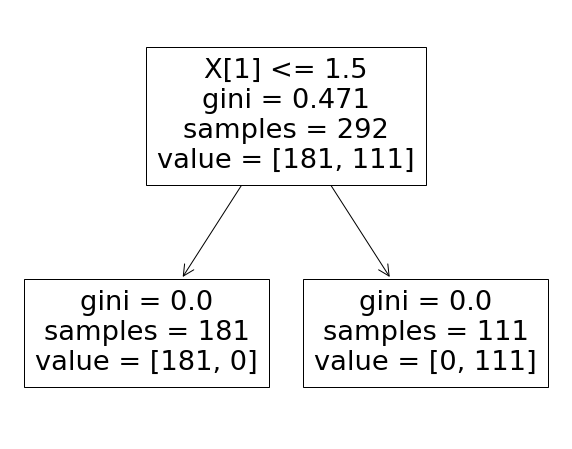

In [ ]:
plt.figure(figsize=(10, 8))

from sklearn import tree 
tree.plot_tree(dtc.fit(x_train, y_train))
plt.show()

**Gradient Boosting Machine**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
gbm= GradientBoostingClassifier(n_estimators = 100, max_features = 'sqrt')
gbm.fit(x_train, y_train)
y_pred_gbm = gbm.predict(x_test)

print('Training Score: {:0.2f}'.format(gbm.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(gbm.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_gbm)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_gbm))
print('Classification Report \n', classification_report(y_test, y_pred_gbm))

Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.000000
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Linear Discriminant Analysis**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)

print('Training Score: {:0.2f}'.format(lda.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(lda.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_lda)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_lda))
print('Classification Report \n', classification_report(y_test, y_pred_lda))

Training Score: 0.65
Testing Score: 0.66
Accuracy Score: 0.658730
Confusion Matrix: 
 [[77  8]
 [35  6]]
Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.91      0.78        85
           1       0.43      0.15      0.22        41

    accuracy                           0.66       126
   macro avg       0.56      0.53      0.50       126
weighted avg       0.60      0.66      0.60       126



**RBF Classifier**

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
RBF = GaussianProcessClassifier(1 * RBF(1.0))
RBF.fit(x_train, y_train)
y_pred_RBF = RBF.predict(x_test)

print('Training Score: {:0.2f}'.format(RBF.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(RBF.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_RBF)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_RBF))
print('Classification Report \n', classification_report(y_test, y_pred_RBF))


Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.000000
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**NuSVC**

In [ ]:
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
NuSVC = NuSVC(kernel = 'rbf', random_state=0)
NuSVC.fit(x_train, y_train)
y_pred_NuSVC = NuSVC.predict(x_test)

print('Training Score: {:0.2f}'.format(NuSVC.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(NuSVC.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_NuSVC)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_NuSVC))
print('Classification Report \n', classification_report(y_test, y_pred_NuSVC))

Training Score: 0.98
Testing Score: 0.98
Accuracy Score: 0.984127
Confusion Matrix: 
 [[83  2]
 [ 0 41]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        85
           1       0.95      1.00      0.98        41

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



**High Gradient Boosting Classifier**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgbm = HistGradientBoostingClassifier()
hgbm.fit(x_train, y_train)
y_pred_hgbm = hgbm.predict(x_test)

print('Training Score: {:0.2f}'.format(hgbm.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(hgbm.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_hgbm)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_hgbm))
print('Classification Report \n', classification_report(y_test, y_pred_hgbm))

accuracy = accuracy_score(y_test, y_pred_hgbm) * 100
print("Gradient Boosting Classifier: " +str(round(accuracy, 2)) + '%')


Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.000000
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Gradient Boosting Classifier: 100.0%


**XBBoost (n_estimators = 500)**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
xgb = xgb.XGBClassifier(n_estimators=500)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print('Training Score: {:0.2f}'.format(xgb.score(x_train, y_train)))
print('Testing Score: {:0.2f}'.format(xgb.score(x_test, y_test)))
print('Accuracy Score: {0:2f}'.format(accuracy_score(y_test, y_pred_xgb)))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_xgb))
print('Classification Report \n', classification_report(y_test, y_pred_xgb))

Training Score: 1.00
Testing Score: 1.00
Accuracy Score: 1.000000
Confusion Matrix: 
 [[85  0]
 [ 0 41]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

